 [1] "Column names in R: " "FASTQ_FILE"          "MD5"                
 [4] "RUN_ID"              "STUDY_ID"            "STUDY_NAME"         
 [7] "CENTER_NAME"         "SUBMISSION_ID"       "SUBMISSION_DATE"    
[10] "SAMPLE_ID"           "SAMPLE_NAME"         "POPULATION"         
[13] "EXPERIMENT_ID"       "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"   
[16] "LIBRARY_NAME"        "RUN_NAME"            "RUN_BLOCK_NAME"     
[19] "INSERT_SIZE"         "LIBRARY_LAYOUT"      "PAIRED_FASTQ"       
[22] "WITHDRAWN"           "WITHDRAWN_DATE"      "COMMENT"            
[25] "READ_COUNT"          "BASE_COUNT"          "ANALYSIS_GROUP"     


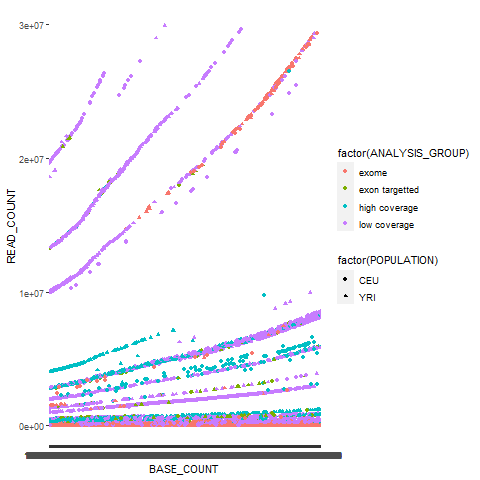

In [19]:
#https://github.com/PacktPublishing/Bioinformatics-with-Python-Cookbook-Second-Edition/blob/master/Chapter01/

import os
from IPython.display import Image
import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2
from rpy2.robjects.functions import SignatureTranslatedFunction
import pandas as pd
from rpy2.robjects import pandas2ri
from rpy2.robjects import default_converter
from rpy2.robjects.conversion import localconverter

read_delim = robjects.r('read.delim')
seq_data = read_delim('sequence.index', header=True, stringsAsFactors=False)

as_integer = robjects.r('as.integer')
match = robjects.r.match
my_col = match('READ_COUNT', seq_data.colnames)[0]
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])
"""
my_col = match('BASE_COUNT', seq_data.colnames)[0]
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])     #Crucial for the yri_ceu data to take form properly. (See Chap1_outTest)
#It sets the data to integers
#The function of 'match' is similar to 'index' in Python
my_col = match('CENTER_NAME', seq_data.colnames)[0]
seq_data[my_col - 1] = robjects.r.toupper(seq_data[my_col - 1])
"""

"""
ggplot2.theme = SignatureTranslatedFunction(ggplot2.theme,
init_prm_translate = {'axis_text_x': 'axis.text.x'})
bar = ggplot2.ggplot(seq_data) + ggplot2.geom_bar() + ggplot2.aes_string(x='CENTER_NAME') + ggplot2.theme(axis_text_x=ggplot2.element_text(angle=90, hjust=1))
robjects.r.png('TestOut1.png', type='cairo-png')
bar.plot()
dev_off = robjects.r('dev.off')
dev_off()
Image(filename = 'TestOut1.png')
"""
robjects.r.assign('seq.data', seq_data)
robjects.r('print(c("Column names in R: ",colnames(seq.data)))')

robjects.r('seq.data <- seq.data[seq.data$WITHDRAWN==0, ]')

robjects.r("seq.data <- seq.data[, c('STUDY_ID', 'STUDY_NAME', 'CENTER_NAME', 'SAMPLE_ID', 'SAMPLE_NAME', 'POPULATION', 'INSTRUMENT_PLATFORM', 'LIBRARY_LAYOUT', 'PAIRED_FASTQ', 'READ_COUNT', 'BASE_COUNT', 'ANALYSIS_GROUP')]")

robjects.r('seq.data$POPULATION <- as.factor(seq.data$POPULATION)')

robjects.r('yri_ceu <- seq.data[seq.data$POPULATION %in% c("YRI", "CEU") & seq.data$BASE_COUNT < 2E9 & seq.data$READ_COUNT < 3E7, ]')
yri_ceu = robjects.r('yri_ceu')
scatter = ggplot2.ggplot(yri_ceu) + ggplot2.aes_string(x='BASE_COUNT', y='READ_COUNT', shape='factor(POPULATION)', col='factor(ANALYSIS_GROUP)') + ggplot2.geom_point()
robjects.r.png('TestOut.png')
scatter.plot()
dev_off = robjects.r('dev.off')
dev_off()
Image(filename='TestOut.png')

In [20]:
"""
robjects.r('yri_ceu <- seq_data[seq_data$POPULATION %in% c("YRI", "CEU") & seq_data$BASE_COUNT <2E9 & seq_data$READ_COUNT < 3E7, ]')
yri_ceu = robjects.r('yri_ceu')

scatter = ggplot2.ggplot(yri_ceu) + ggplot2.aes_string(x='BASE_COUNT', y = 'READ_COUNT', shape = 'factor(POPULATION)', col = 'factor(ANALYSIS_GROUP)') + ggplot2.geom_point()
robjects.r.png('out2.png')
scatter.plot()
"""

'\nrobjects.r(\'yri_ceu <- seq_data[seq_data$POPULATION %in% c("YRI", "CEU") & seq_data$BASE_COUNT <2E9 & seq_data$READ_COUNT < 3E7, ]\')\nyri_ceu = robjects.r(\'yri_ceu\')\n\nscatter = ggplot2.ggplot(yri_ceu) + ggplot2.aes_string(x=\'BASE_COUNT\', y = \'READ_COUNT\', shape = \'factor(POPULATION)\', col = \'factor(ANALYSIS_GROUP)\') + ggplot2.geom_point()\nrobjects.r.png(\'out2.png\')\nscatter.plot()\n'